<a href="https://colab.research.google.com/github/M-Borsuk/ChurnModelling/blob/main/ChurnModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Download the dataset here!**


<a href='https://www.kaggle.com/shubh0799/churn-modelling' > Link to the dataset from Kaggle.com </a>

# **Introduction into the problem**

<h1 align=center><strong>Customer churn</strong></h1>


---

<p align='center'><a  href='https://nbviewer.jupyter.org/github/M-Borsuk/ChurnModelling/blob/3f840f89b3483cd3e4559b5d5bc384292995b0df/ChurnModelling.ipynb' > View the notebook here for better readability </a></p>

<br>
<br>
<br>
<figure align=center>
  <img src='https://www.pointillist.com/wp-content/uploads/2017/11/Running-4-the-Exit-2-844x422.png' style='width:100%'>
  <figcaption align='center'> <a href='https://www.pointillist.com/blog/reduce-churn-customer-journey-analytics/' >Picture 1. General picture of churn</a> </figcaption>
 </figure>
<br>
<br>


---


<p align='center'> As we can read from <a href='https://en.wikipedia.org/wiki/Churn_rate'> Wikipedia</a> , <strong> The churn rate </strong> in a most basic form is a measure of the number of individuals or items moving out of a collective group over a specific period. It is one of two primary factors that determine the steady-state level of customers a business will support.<a href='https://en.wikipedia.org/wiki/Customer_rate' > [1] </a></p>
<br>
<p align='center'>
When it comes to <strong>customer churn</strong> infrastructures like <strong>banks, telephone service companies, internet service providers, pay TV companies, insurance firms, and alarm monitoring services</strong> often use customer churn rates analysis as one of their key business metrics, because the cost of <strong> retaining an existing customer </strong> is far less than <strong>acquiring a new one.</strong><a href='https://en.wikipedia.org/wiki/Customer_attrition' > [2] </a>
</p>
<br>
<p align='center'>
In the business context, <strong>churn</strong> refers both to <strong>customers migration,</strong> but also to their <strong>loss of value.</strong> <strong>Churn rate</strong> refers, on the one hand, to the <strong>percentage of customers who end their relation with the organization</strong>,but on the other hand, to the customers who <strong>still receive their services, but not as much or not as often as they used to</strong>. Current organizations face therefore a <strong>huge challenge</strong>.
The ability to anticipate to customers abandon in order to retain them results in <strong>gaining efficiency and competitivity</strong> in the market.There are <strong>advanced analytics tools and applications</strong>, especially designed to analyze in depth the enormous amount of <strong>data</strong> inside the organizations to make <strong>predictions</strong> based on the information obtained from <strong>analyzing and exploring those data.</strong><a href='https://en.wikipedia.org/wiki/Customer_attrition' > [2] </a> </p>


---


<br>
<figure align=center>
  <img src='https://drek4537l1klr.cloudfront.net/gold/v-7/Figures/02_img_0016.jpg' style='width:100%'>
  <figcaption align='center'> <a href='https://livebook.manning.com/book/fighting-churn-with-data/chapter-2/v-7/' > Diagram of the churn rate definition</a> </figcaption>
 </figure>
 <br>
 <br>
 <figure align=center>
  <img src='https://2021.ai/wp-content/uploads/2019/11/churn.png' style='width:100%'>
  <figcaption align='center'> <a href='https://imedicalsociety.org/pneumonia/' > How to predict the customer's exit with data modeling </a> </figcaption>
 </figure>
 <br>
 <br>


---



<p align='center'>
The goal of this project is to <strong>analyse and model the data</strong>, that came from the <strong>banking institution</strong>, that will allow the bussiness to <strong>gain information</strong> about their customers and <strong>predict</strong> their potential exit.
</p>
<p align='center'>
<br>
<br>


---

<br>
<p align='center'><strong>LET'S DIVE IN !</strong></p>
<br>


---

# **General modules imports**

In [71]:
!pip install plotly
!pip install imbalanced-learn
!pip install keras-tuner

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from scipy import stats
from scipy.stats import norm,mannwhitneyu
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest,SelectFromModel
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Input,BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import plotly.io as pio

# **Configuration and reading in the data**

In [73]:
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

In [74]:
pio.renderers.default = "notebook_connected"

In [75]:
sns.set("poster","ticks")
sns.color_palette("tab10")
rcParams['figure.figsize'] = 6,8

In [76]:
df = pd.read_csv("/content/drive/My Drive/ChurnModel/Churn_Modelling.csv")

Let's get a quick view of the data aswell as some metrics about every column

In [77]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [79]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


First look at the data shows me a few things:


1.   No missing values in the dataset
2.   Columns like RowNumber, CustomerId and Surname most probably don't carry a lot of usable information in terms of EDA and model building
3.   Most of our customers are around 40 years old. Also the median and the mean of the age is only a little different. This might suggest a distribution close to gaussian
4.   At least 25% of our customers has a balance equal to zero.
5.   When it comes to estimated salary of the customers the mean and the median is also very close to each other.
6.   The target variable is highly imbalanced. At least 75% of our customers in the dataset didn't exit our company. It's pretty common in these types of problems. We will definitely need to adress this issue down the road
 


In [80]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [81]:
df = df[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]

# **Explanatory data analysis**

---


Let's start by getting some insight of how our data looks in each of the columns

In [82]:
def plot_countplot(df,x):
  sns.countplot(x=x,data = df)
  plt.title("Distribution of {} values".format(x))
  plt.show()

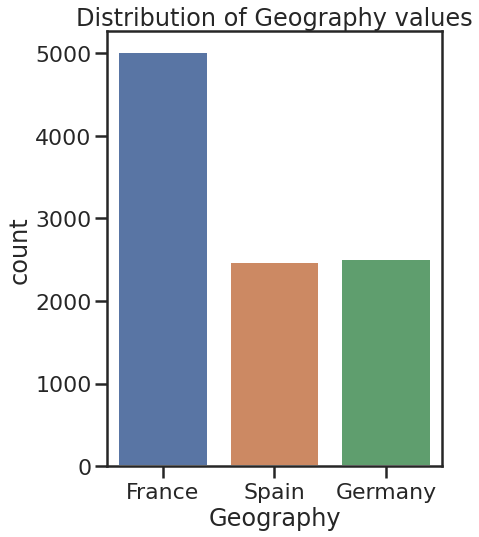

In [83]:
plot_countplot(df,"Geography")

Most of the customers in the dataset are from France.

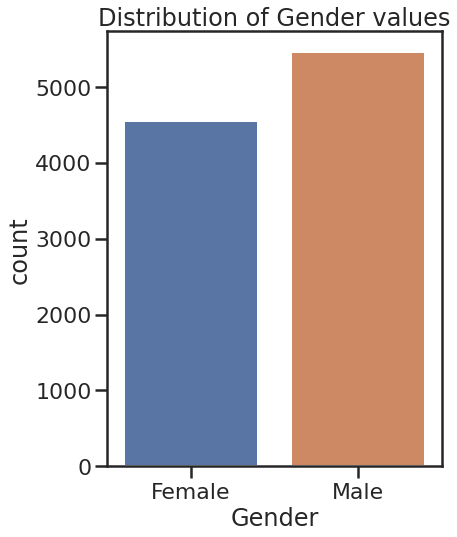

In [84]:
plot_countplot(df,"Gender")

The distribution of gender variable is slightly skewed towards males. Although, it's not a big difference.

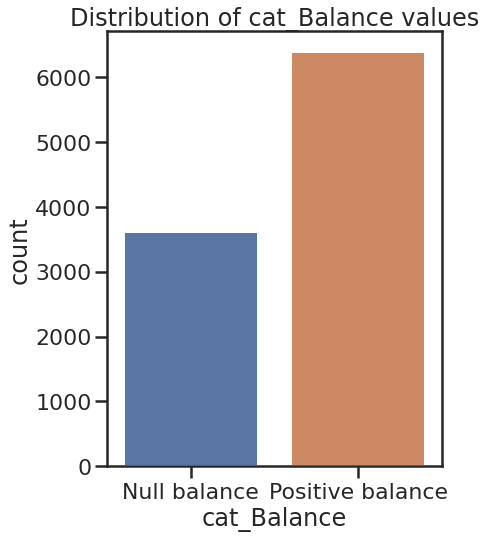

In [85]:
df["cat_Balance"] = df["Balance"].apply(lambda x: "Negative balance" if x < 0 else "Positive balance" if x > 0 else "Null balance")
plot_countplot(df,"cat_Balance")

I decided to create a temporary variable, which shows us how many customers have zero balance in their account. As we can see, approximately 1/3 of our customers have null balance. We already saw this dependency in the first look of our data, but this shows that this number actually exceeds 25% of customers.

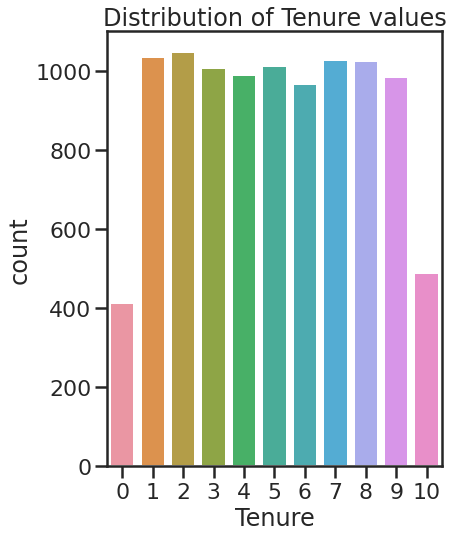

In [86]:
plot_countplot(df,"Tenure")

The tenure follows a distribution that looks like somehting related to uniform distribution, but with lower values with 10 years and 0 year of tenure.

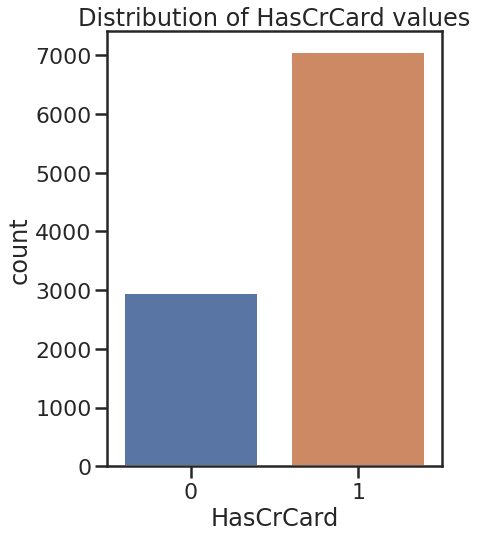

In [87]:
plot_countplot(df,"HasCrCard")

What this plot tells is that 70% of customers in our dataset has a credit card. Later on we will discover if it has a impact on a customer leaving

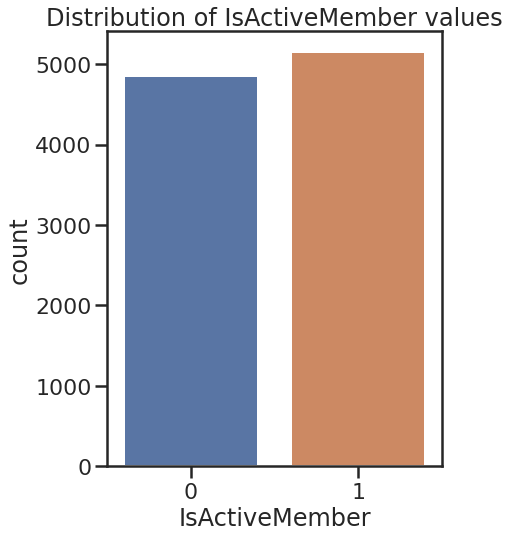

In [88]:
plot_countplot(df,"IsActiveMember")

Customers in our dataset are pretty much 50/50 between active and non active members. Later on we will discover if it has a impact on a customer leaving

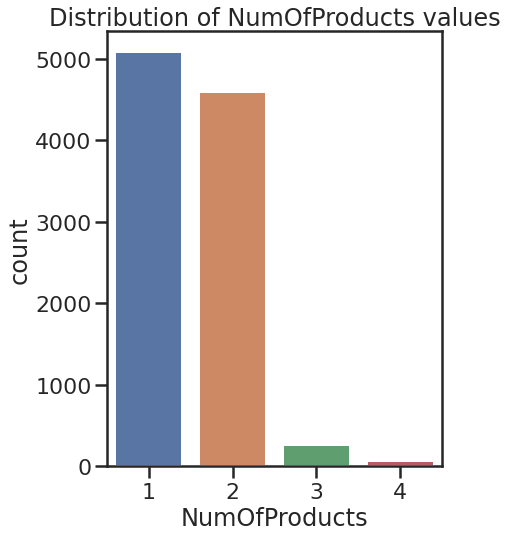

In [89]:
plot_countplot(df,"NumOfProducts")

Most of the customers has either one or two products in the company. We can also notice that some small number of them have three or four.

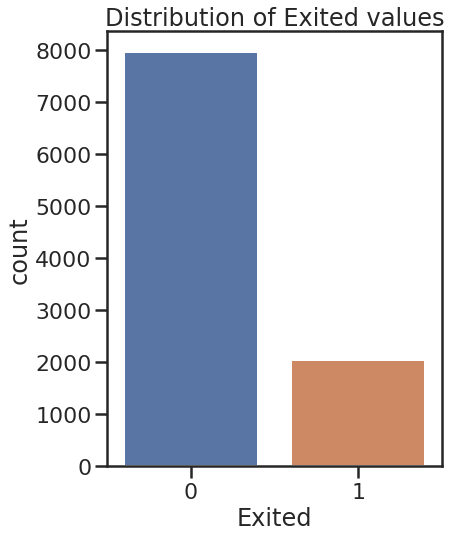

In [90]:
plot_countplot(df,"Exited")

Now we will look into distributions of continous variables.

In [91]:
def plot_histogram(x0,x1 = None,bins=None):
  fig = go.Figure()
  if x1 is not None:
    fig.add_trace(go.Histogram(x=x0,name="Didn't exit",histnorm='probability density',nbinsx=bins))
    fig.add_trace(go.Histogram(x=x1,name="Exited",histnorm='probability density',nbinsx=bins))
  else:
    fig.add_trace(go.Histogram(x=x0,histnorm='probability density',nbinsx=bins))
  fig.update_layout(barmode='overlay',title="{}".format(x0.name))
  fig.update_traces(opacity=0.5)
  fig.show()


In [92]:
def calculate_cohen_d(dist_1,dist_2):
  d = (np.average(dist_1) - np.average(dist_2))/np.sqrt((len(dist_1) * np.var(dist_1) + len(dist_2) * np.var(dist_2))/(len(dist_1) + len(dist_2) - 2))
  print("Absolute value of Cohen's d: {}\n{} effect size".format(np.abs(d),
                                                                 "Very Low" if (np.abs(d) <= 0.2) else 
                                                                 "Low" if (np.abs(d) > 0.2 and np.abs(d) <= 0.5) else 
                                                                 "Medium" if (np.abs(d) > 0.5 and np.abs(d) <= 0.8) else 
                                                                 "High"))

In [93]:
plot_histogram(df["CreditScore"],bins=50)

The distribution shows most of our customers have around 600 - 720 credit score. We can also notice a peak around 840-860 credit score.

In [94]:
plot_histogram(df[df["Exited"] == 0]["CreditScore"],df[df["Exited"] == 1]["CreditScore"],50)

In [95]:
calculate_cohen_d(df[df["Exited"] == 0]["CreditScore"],df[df["Exited"] == 1]["CreditScore"])

Absolute value of Cohen's d: 0.06728959284882163
Very Low effect size


In [96]:
mwu = mannwhitneyu(df[df["Exited"] == 0]["CreditScore"],df[df["Exited"] == 1]["CreditScore"])
print("U-statistic for credit score given the customer exited or not: {}\nP-value: {}\nTwo groups{}come from the same population \
(based on the mann whitney U test at 1% significance level)".format(mwu[0],mwu[1]," " if round(mwu[1],2) >= 0.01 else " do not "))

U-statistic for credit score given the customer exited or not: 7839548.0
P-value: 0.00993433058636417
Two groups come from the same population (based on the mann whitney U test at 1% significance level)


When it comes to conditional disrtibution when it comes to credit score whether the customer exited, they overlap a lot. We can see that people that had less than 400 credit score exited the company. Other than that these distribution seem to be closely related.

In [97]:
plot_histogram(df["Age"],bins=50)

Like we saw before the distribution of the age seems to be slighly right skewed. We will try to apply some transformations to normalize the distribution of this variable.

In [98]:
plot_histogram(df[df["Exited"] == 0]["Age"],df[df["Exited"] == 1]["Age"],50)

As we can see, The conditional disrtibutions when it comes to age of the cutomer whether the customer exited, do not overlap a whole bunch. That might mean that age of customer might have a big impact on whether he will leave. Older customers tend to leave the company more frequently than the younger customers. That's definitely something that I will keep in mind for future analysis in this project.

In [99]:
calculate_cohen_d(df[df["Exited"] == 0]["Age"],df[df["Exited"] == 1]["Age"])

Absolute value of Cohen's d: 0.7390919905296035
Medium effect size


In [100]:
mwu = mannwhitneyu(df[df["Exited"] == 0]["Age"],df[df["Exited"] == 1]["Age"])
print("U-statistic for age given the customer exited or not: {}\nP-value: {}\nTwo groups{}come from the same population \
(based on the mann whitney U test at 1% significance level)".format(mwu[0],mwu[1]," " if round(mwu[1],2) >= 0.01 else " do not "))

U-statistic for age given the customer exited or not: 4345981.5
P-value: 1.6052007159685838e-230
Two groups do not come from the same population (based on the mann whitney U test at 1% significance level)


In [101]:
plot_histogram(df["Balance"],bins=50)

This plot confirms what we saw earlier on. 1/3 of customers have null balance. Let's see how it relates to customer leaving

In [102]:
plot_histogram(df[df["Exited"] == 0]["Balance"],df[df["Exited"] == 1]["Balance"],50)

So what we can note from that is that people with null balance leave less often than not.

In [103]:
calculate_cohen_d(df[df["Exited"] == 0]["Balance"],df[df["Exited"] == 1]["Balance"])

Absolute value of Cohen's d: 0.29636961846423865
Low effect size


In [104]:
mwu = mannwhitneyu(df[df["Exited"] == 0]["Balance"],df[df["Exited"] == 1]["Balance"])
print("U-statistic for balance given the customer exited or not: {}\nP-value: {}\nTwo groups{}come from the same population \
(based on the mann whitney U test at 1% significance level)".format(mwu[0],mwu[1]," " if round(mwu[1],2) >= 0.01 else " do not "))

U-statistic for balance given the customer exited or not: 6849444.5
P-value: 5.579199689574611e-29
Two groups do not come from the same population (based on the mann whitney U test at 1% significance level)


In [105]:
plot_histogram(df['EstimatedSalary'],bins=50)

We can see that estimated salary of customers in our dataset follows a distribution that looks closely like uniform distribution.

In [106]:
plot_histogram(df[df["Exited"] == 0]['EstimatedSalary'],df[df["Exited"] == 1]['EstimatedSalary'],50)

What we can see from the conditional distributions, is that they overlap a lot. We can see a bigger peak around 187 - 192 k of estimated salary when it comes to customers exiting, but other than that we can't really distinguish bigger differences between these distributions.

In [107]:
calculate_cohen_d(df[df["Exited"] == 0]['EstimatedSalary'],df[df["Exited"] == 1]['EstimatedSalary'])

Absolute value of Cohen's d: 0.03003496730651614
Very Low effect size


In [108]:
mwu = mannwhitneyu(df[df["Exited"] == 0]['EstimatedSalary'],df[df["Exited"] == 1]['EstimatedSalary'])
print("U-statistic for estimated salary given the customer exited or not: {}\nP-value: {}\nTwo groups{}come from the same population \
(based on the mann whitney U test at 1% significance level)".format(mwu[0],mwu[1]," " if round(mwu[1],2) >= 0.01 else " do not "))

U-statistic for estimated salary given the customer exited or not: 7969863.0
P-value: 0.11352575465076892
Two groups come from the same population (based on the mann whitney U test at 1% significance level)


Next up, let's view some boxplots to see some potential anomalies in our dataset

In [109]:
def plot_boxplot(y0,y1=None):
  fig = go.Figure()
  if y1 is not None:
    fig.add_trace(go.Box(x=y0,name="Didn't exit"))
    fig.add_trace(go.Box(x=y1,name="Exited"))
  else:
    fig.add_trace(go.Box(x=y0,name=y0.name))
  fig.update_layout(title="{}".format(y0.name))
  fig.show()

In [110]:
plot_boxplot(df["CreditScore"])

We can notice that some of the smaller amounts of credit score are lower than the lower fence of the variable. Lets view how it relates to conditional variables combined with our target variable

In [111]:
plot_boxplot(df[df["Exited"] == 0]["CreditScore"],df[df["Exited"] == 1]["CreditScore"])

In [ ]:
plot_boxplot(df["EstimatedSalary"])

In [ ]:
plot_boxplot(df[df["Exited"] == 0]["EstimatedSalary"],df[df["Exited"] == 1]["EstimatedSalary"])

In [ ]:
plot_boxplot(df["Tenure"])

In [ ]:
plot_boxplot(df[df["Exited"] == 0]["Tenure"],df[df["Exited"] == 1]["Tenure"])

In [ ]:
plot_boxplot(df["Balance"])

In [ ]:
plot_boxplot(df[df["Exited"] == 0]["Balance"],df[df["Exited"] == 1]["Balance"])

In [ ]:
def plot_barplot(df,x,y,color=None):
  vals = df.groupby(x).sum()[y].values
  df[y] = df[y].apply(lambda c: str(np.round((c / vals[0]) * 100)) + "%" if df[df[y] == c][x].values[0] == 0 else str(np.round((c / vals[1]) * 100)) + "%")
  fig = px.bar(df, x=x, y="Balance",color=color,hover_data=[x, color],title="{} vs {}".format(x,color),text=y,color_continuous_scale=["red", "green", "blue"])

  fig.update_traces(marker_line_width=1.5, opacity=0.6,textposition='inside', textfont_size=14,textfont_color="white")
  fig.show()

In [ ]:
plot_barplot(df.groupby(["Exited","cat_Balance"]).count().reset_index(),"Exited","Tenure","cat_Balance")

In [ ]:
plot_barplot(df.groupby(["Exited","Geography"]).count().reset_index(),"Exited","Tenure","Geography")

In [ ]:
plot_barplot(df.groupby(["Exited","Gender"]).count().reset_index(),"Exited","Tenure","Gender")

In [ ]:
plot_barplot(df.groupby(["Exited","IsActiveMember"]).count().reset_index(),"Exited","Tenure","IsActiveMember")

In [ ]:
plot_barplot(df.groupby(["Exited","HasCrCard"]).count().reset_index(),"Exited","Tenure","HasCrCard")

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'cat_Balance'],
      dtype='object')

In [ ]:
df["iso_alpha"] = df["Geography"].apply(lambda x: "DEU" if x == "Germany" else "ESP" if x == "Spain" else "FRA")

In [ ]:
def plot_map(df,color):
  fig = px.choropleth(df, locations="iso_alpha",
                    color=color,
                    
                    color_continuous_scale="Inferno")
  fig.update_geos(scope="europe")
  fig.show()

In [ ]:
plot_map(df.groupby("iso_alpha").mean().reset_index(),"Exited")

In [ ]:
plot_map(df.groupby("iso_alpha").mean().reset_index(),"Balance")

In [ ]:
df.drop(columns=["iso_alpha"],inplace=True)

# **Feature engineering**

In [ ]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df['cat_Balance'].unique()

array(['Null balance', 'Positive balance'], dtype=object)

In [ ]:
df = pd.get_dummies(df,prefix=['country'], columns = ['Geography'], drop_first=True)

In [ ]:
df['cat_Balance'] = df['cat_Balance'].apply(lambda x: 0 if x == "Null balance" else 1)

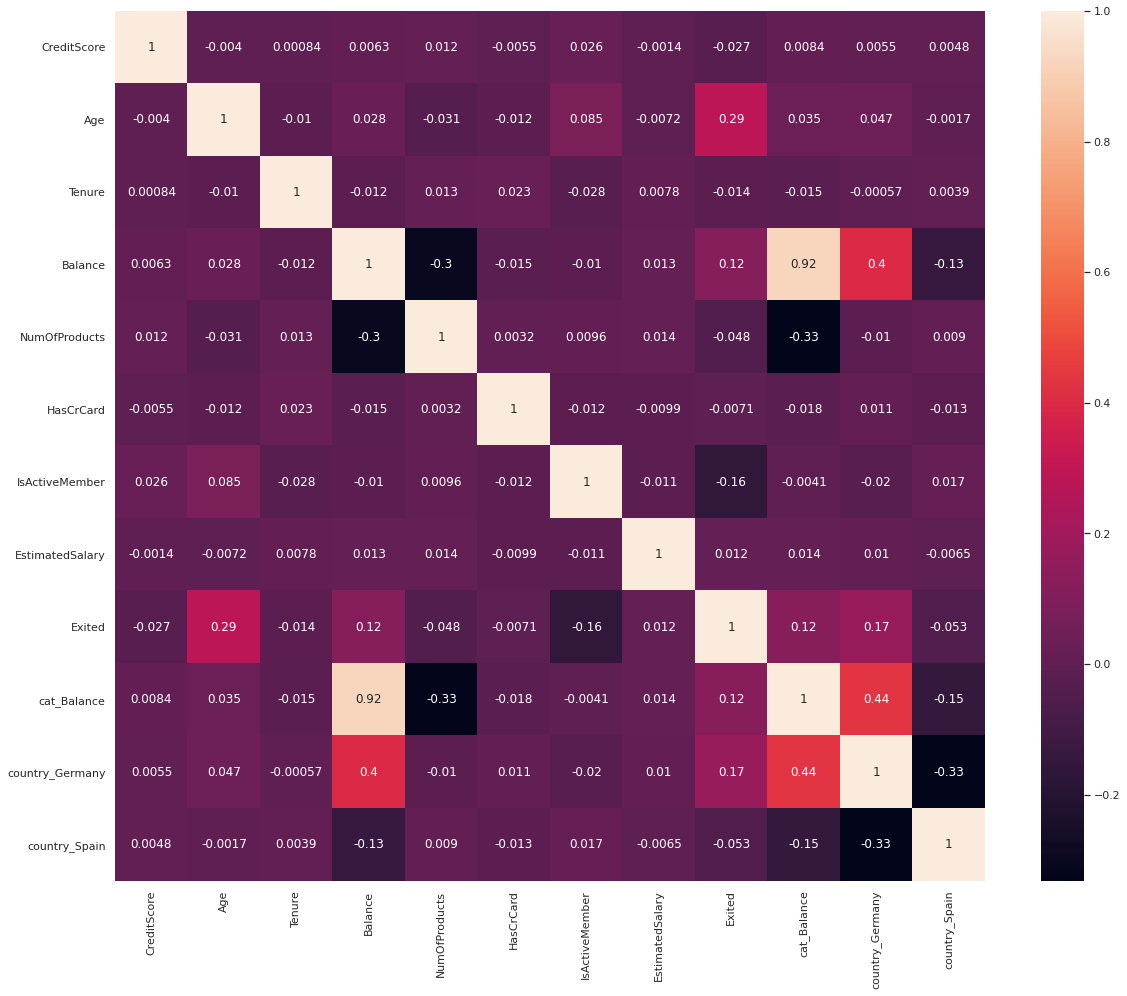

In [ ]:
sns.set(font_scale=1)
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(corr_matrix, vmax=1, square=True,annot = True)

In [ ]:
corr_matrix["Exited"].apply(lambda x: np.abs(x)).sort_values(ascending = False)

Exited             1.000000
Age                0.285323
country_Germany    0.173488
IsActiveMember     0.156128
cat_Balance        0.122357
Balance            0.118533
country_Spain      0.052667
NumOfProducts      0.047820
CreditScore        0.027094
Tenure             0.014001
EstimatedSalary    0.012097
HasCrCard          0.007138
Name: Exited, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



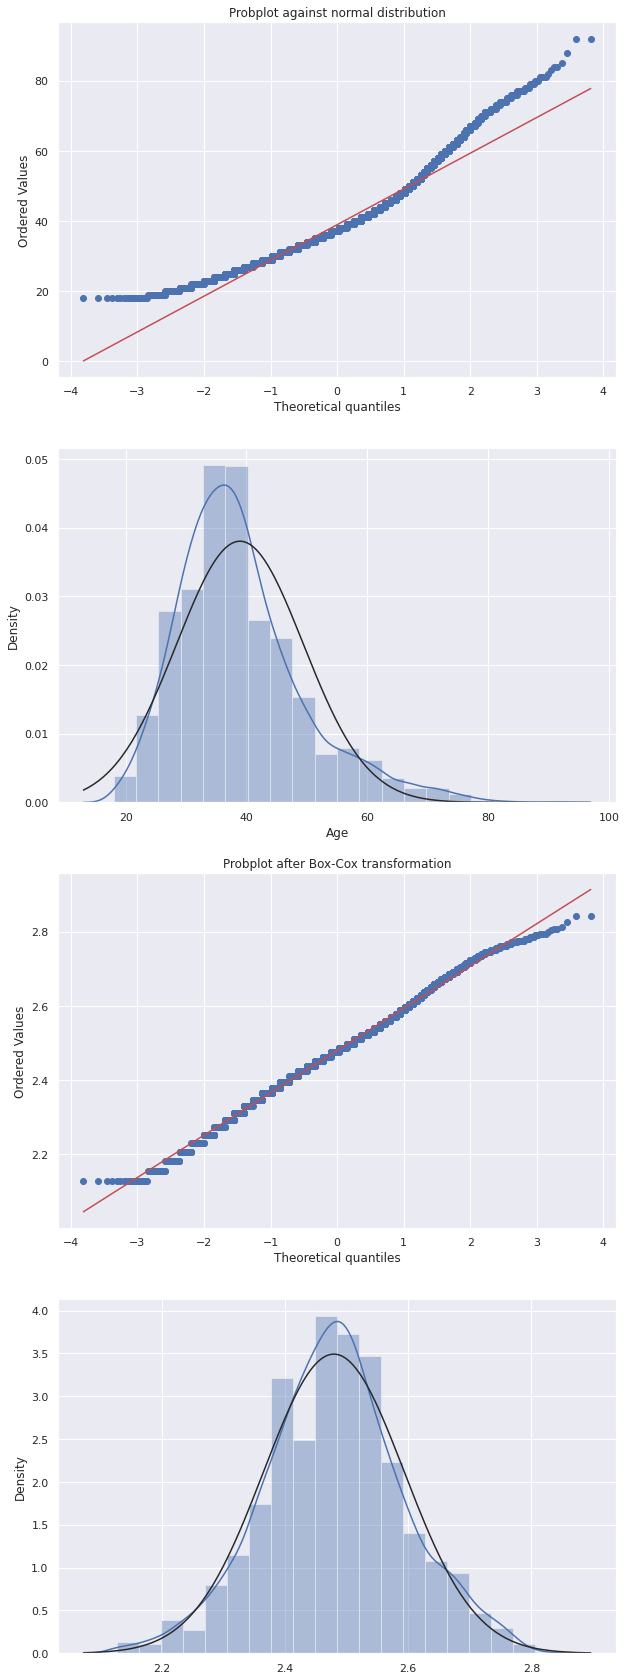

In [ ]:
fig = plt.figure(figsize=(10,30))
ax1 = fig.add_subplot(411)
stats.probplot(df["Age"], dist=stats.norm,plot=ax1)
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(412)
sns.distplot(df["Age"],bins = 20,fit=norm)
ax3 = fig.add_subplot(413)
x, _ = stats.boxcox(df["Age"])
stats.probplot(x, dist=stats.norm,plot=ax3)
ax3.set_title('Probplot after Box-Cox transformation')
ax4 = fig.add_subplot(414)
sns.distplot(x,bins = 20,fit=norm)

In [ ]:
df["Age_BC"], _ = stats.boxcox(df["Age"])

In [ ]:
df.drop(columns=["Age"],inplace=True)

In [ ]:
df["Gender"] = df["Gender"].apply(lambda x: 1 if x=="Female" else 0)

In [ ]:
X,y = df[[x for x in df.columns if x != "Exited"]],df["Exited"]

In [ ]:
X.shape

(10000, 12)

In [ ]:
X_new = SelectKBest(chi2, k=6).fit_transform(X, y)

In [ ]:
X.head()

,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,cat_Balance,country_Germany,country_Spain,Age_BC
0,619,1,2,0.00,1,1,1,101348.88,0,0,0,2.530867
1,608,1,1,83807.86,1,0,1,112542.58,1,0,1,2.520415
2,502,1,8,159660.80,3,1,0,113931.57,1,0,0,2.530867
3,699,1,1,0.00,2,0,0,93826.63,0,0,0,2.498541
4,850,1,2,125510.82,1,1,1,79084.10,1,0,1,2.541019


In [ ]:
pd.DataFrame(X_new).head()

,0,1,2,3,4,5
0,619.0,1.0,0.00,1.0,101348.88,0.0
1,608.0,1.0,83807.86,1.0,112542.58,0.0
2,502.0,1.0,159660.80,0.0,113931.57,0.0
3,699.0,1.0,0.00,0.0,93826.63,0.0
4,850.0,1.0,125510.82,1.0,79084.10,0.0


In [ ]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
for i in range(8):
  print(sorted(zip(clf.feature_importances_,X.columns),reverse=True)[i])

(0.231963863100233, 'Age_BC')
(0.14787704225730122, 'NumOfProducts')
(0.1368607937398036, 'EstimatedSalary')
(0.13628673492242066, 'CreditScore')
(0.11344401257526143, 'Balance')
(0.10414855342840901, 'Tenure')
(0.03585160592048088, 'IsActiveMember')
(0.027644039439782987, 'country_Germany')


In [ ]:
new_columns = [str(x[1]) for x in sorted(zip(clf.feature_importances_,X.columns),reverse=True)[:7]]

In [ ]:
new_columns

['Age_BC',
 'NumOfProducts',
 'EstimatedSalary',
 'CreditScore',
 'Balance',
 'Tenure',
 'IsActiveMember']

In [ ]:
X = X[['Age_BC',
 'NumOfProducts',
 'EstimatedSalary',
 'CreditScore',
 'Balance',
 'Tenure',
 'IsActiveMember']]

In [ ]:
X.shape

(10000, 7)

In [ ]:
y[y == 1].shape,y[y == 0].shape

((2037,), (7963,))

In [ ]:
columns = X.columns

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X = pd.DataFrame(X,columns=columns)

In [ ]:
X.sample(5)

,Age_BC,NumOfProducts,EstimatedSalary,CreditScore,Balance,Tenure,IsActiveMember
5367,0.550156,0.000000,0.328260,0.646,0.000000,0.5,1.0
662,0.374573,0.333333,0.293987,0.656,0.000000,0.2,1.0
7444,0.331038,0.333333,0.900361,0.784,0.000000,0.4,1.0
5777,0.824944,0.000000,0.328764,0.516,0.493967,0.8,1.0
1919,0.733406,0.000000,0.712011,0.536,0.000000,0.7,1.0


# **SMOTE**

In [ ]:
smote = SMOTE(sampling_strategy = 'minority')

In [ ]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
X_s,y_s = smote.fit_sample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
X = pd.DataFrame(X_s,columns=X.columns)

In [ ]:
X.tail()

,Age_BC,NumOfProducts,EstimatedSalary,CreditScore,Balance,Tenure,IsActiveMember
15921,0.633080,0.000000,0.580974,0.428721,0.562023,0.200000,0.0
15922,0.455950,0.000000,0.579860,0.833068,0.522871,0.600000,0.0
15923,0.453957,0.666667,0.304824,0.742518,0.400832,0.244091,0.0
15924,0.629029,0.000000,0.115200,0.687065,0.335189,0.300000,0.0
15925,0.530029,0.666667,0.563985,0.566734,0.497339,0.279465,0.0


In [ ]:
y= pd.Series(y_s)

In [ ]:
y.value_counts()

1    7963
0    7963
dtype: int64

In [ ]:
y.shape[0] == X.shape[0]

True

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# **Model building**

## **ANN**


In [ ]:
X_train.shape

(12740, 7)

In [ ]:
def build_model(hp):
  model = Sequential([
      Dense(units = hp.Int("dense_1",min_value = 512, max_value = 1024,step=64), activation='relu',input_dim = X_train.shape[1]),
      Dropout(0.25),
      BatchNormalization(),
      Dense(units =hp.Int("dense_2",min_value = 256, max_value = 512,step=64), activation='relu'),
      Dropout(0.25),
      BatchNormalization(),
      Dense(units = hp.Int("dense_3",min_value = 128, max_value = 256,step=64), activation='relu'),
      Dropout(0.25),
      BatchNormalization(),
      Dense(units = hp.Int("dense_4",min_value = 64, max_value = 128,step=32), activation='relu'),
      Dropout(0.25),
      BatchNormalization(),
      Dense(units = 32, activation='relu'),
      Dropout(0.25),
      BatchNormalization(),
      Dense(units = 16, activation='relu'),
      Dropout(0.25),
      BatchNormalization(),
      Dense(units = 1, activation='sigmoid')
  ])




  model.compile(loss='binary_crossentropy',optimizer=Adam(hp.Choice("lr",values=[1e-1,1e-2,1e-3,1e-4])),metrics=['accuracy'])
  return model

In [ ]:
tuner_search = RandomSearch(build_model,objective="val_accuracy",max_trials=10)

In [ ]:
tuner_search.search(X_train,y_train,batch_size=64,epochs=100,validation_split=0.2,validation_batch_size=64,verbose=1)

Epoch 1/100
160/160 [==============================] - 2s 10ms/step - loss: 0.9274 - accuracy: 0.5182 - val_loss: 0.7245 - val_accuracy: 0.5016
Epoch 2/100
160/160 [==============================] - 1s 8ms/step - loss: 0.8049 - accuracy: 0.5759 - val_loss: 0.6896 - val_accuracy: 0.5310
Epoch 3/100
160/160 [==============================] - 1s 8ms/step - loss: 0.7567 - accuracy: 0.5979 - val_loss: 0.6344 - val_accuracy: 0.6334
Epoch 4/100
160/160 [==============================] - 1s 8ms/step - loss: 0.7302 - accuracy: 0.6142 - val_loss: 0.5717 - val_accuracy: 0.6829
Epoch 5/100
160/160 [==============================] - 1s 8ms/step - loss: 0.6898 - accuracy: 0.6321 - val_loss: 0.5386 - val_accuracy: 0.7131
Epoch 6/100
160/160 [==============================] - 1s 8ms/step - loss: 0.6830 - accuracy: 0.6344 - val_loss: 0.5202 - val_accuracy: 0.7288
Epoch 7/100
160/160 [==============================] - 1s 8ms/step - loss: 0.6665 - accuracy: 0.6403 - val_loss: 0.5052 - val_accuracy: 0.742

Epoch 1/100
160/160 [==============================] - 2s 9ms/step - loss: 0.5911 - accuracy: 0.6795 - val_loss: 0.6471 - val_accuracy: 0.5239
Epoch 2/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5338 - accuracy: 0.7286 - val_loss: 0.5731 - val_accuracy: 0.7096
Epoch 3/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5281 - accuracy: 0.7337 - val_loss: 0.4916 - val_accuracy: 0.7684
Epoch 4/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5287 - accuracy: 0.7365 - val_loss: 0.5225 - val_accuracy: 0.7465
Epoch 5/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5237 - accuracy: 0.7377 - val_loss: 0.4716 - val_accuracy: 0.7783
Epoch 6/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5173 - accuracy: 0.7419 - val_loss: 0.4884 - val_accuracy: 0.7590
Epoch 7/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5175 - accuracy: 0.7426 - val_loss: 0.5227 - val_accuracy: 0.7041

Epoch 1/100
160/160 [==============================] - 1s 9ms/step - loss: 0.6588 - accuracy: 0.6349 - val_loss: 0.7127 - val_accuracy: 0.4984
Epoch 2/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5583 - accuracy: 0.7065 - val_loss: 0.6915 - val_accuracy: 0.5059
Epoch 3/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5355 - accuracy: 0.7250 - val_loss: 0.5818 - val_accuracy: 0.6978
Epoch 4/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5210 - accuracy: 0.7416 - val_loss: 0.4809 - val_accuracy: 0.7708
Epoch 5/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5161 - accuracy: 0.7401 - val_loss: 0.4781 - val_accuracy: 0.7692
Epoch 6/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5186 - accuracy: 0.7429 - val_loss: 0.4632 - val_accuracy: 0.7763
Epoch 7/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5091 - accuracy: 0.7448 - val_loss: 0.4549 - val_accuracy: 0.7794

Epoch 1/100
160/160 [==============================] - 1s 9ms/step - loss: 0.6499 - accuracy: 0.6193 - val_loss: 1.0462 - val_accuracy: 0.6499
Epoch 2/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5957 - accuracy: 0.6975 - val_loss: 0.8666 - val_accuracy: 0.6656
Epoch 3/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5713 - accuracy: 0.7084 - val_loss: 0.5115 - val_accuracy: 0.7335
Epoch 4/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5683 - accuracy: 0.7122 - val_loss: 1.3176 - val_accuracy: 0.6837
Epoch 5/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5641 - accuracy: 0.7154 - val_loss: 0.5040 - val_accuracy: 0.7531
Epoch 6/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5631 - accuracy: 0.7209 - val_loss: 0.5463 - val_accuracy: 0.6813
Epoch 7/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5615 - accuracy: 0.7168 - val_loss: 0.5274 - val_accuracy: 0.7614

Epoch 1/100
160/160 [==============================] - 1s 9ms/step - loss: 0.7118 - accuracy: 0.6100 - val_loss: 0.6746 - val_accuracy: 0.6346
Epoch 2/100
160/160 [==============================] - 1s 8ms/step - loss: 0.6040 - accuracy: 0.6732 - val_loss: 0.6238 - val_accuracy: 0.7127
Epoch 3/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5545 - accuracy: 0.7150 - val_loss: 0.5308 - val_accuracy: 0.7555
Epoch 4/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5361 - accuracy: 0.7251 - val_loss: 0.4750 - val_accuracy: 0.7684
Epoch 5/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5225 - accuracy: 0.7424 - val_loss: 0.4702 - val_accuracy: 0.7704
Epoch 6/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5191 - accuracy: 0.7414 - val_loss: 0.4652 - val_accuracy: 0.7755
Epoch 7/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5149 - accuracy: 0.7442 - val_loss: 0.4636 - val_accuracy: 0.7688

Epoch 1/100
160/160 [==============================] - 1s 9ms/step - loss: 0.6152 - accuracy: 0.6646 - val_loss: 0.6607 - val_accuracy: 0.5561
Epoch 2/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5367 - accuracy: 0.7285 - val_loss: 0.5701 - val_accuracy: 0.6809
Epoch 3/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5288 - accuracy: 0.7319 - val_loss: 0.4676 - val_accuracy: 0.7712
Epoch 4/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5208 - accuracy: 0.7468 - val_loss: 0.5376 - val_accuracy: 0.7159
Epoch 5/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5172 - accuracy: 0.7424 - val_loss: 0.5223 - val_accuracy: 0.7575
Epoch 6/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5169 - accuracy: 0.7467 - val_loss: 0.5296 - val_accuracy: 0.7268
Epoch 7/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5219 - accuracy: 0.7404 - val_loss: 0.4700 - val_accuracy: 0.7834

Epoch 1/100
160/160 [==============================] - 1s 9ms/step - loss: 0.8350 - accuracy: 0.5380 - val_loss: 0.7393 - val_accuracy: 0.5016
Epoch 2/100
160/160 [==============================] - 1s 8ms/step - loss: 0.7845 - accuracy: 0.5573 - val_loss: 0.7372 - val_accuracy: 0.5016
Epoch 3/100
160/160 [==============================] - 1s 8ms/step - loss: 0.7492 - accuracy: 0.5787 - val_loss: 0.6661 - val_accuracy: 0.5836
Epoch 4/100
160/160 [==============================] - 1s 8ms/step - loss: 0.7198 - accuracy: 0.5968 - val_loss: 0.5831 - val_accuracy: 0.7127
Epoch 5/100
160/160 [==============================] - 1s 8ms/step - loss: 0.6928 - accuracy: 0.6110 - val_loss: 0.5546 - val_accuracy: 0.7363
Epoch 6/100
160/160 [==============================] - 1s 8ms/step - loss: 0.6773 - accuracy: 0.6238 - val_loss: 0.5383 - val_accuracy: 0.7496
Epoch 7/100
160/160 [==============================] - 1s 8ms/step - loss: 0.6558 - accuracy: 0.6385 - val_loss: 0.5265 - val_accuracy: 0.7504

Epoch 1/100
160/160 [==============================] - 1s 9ms/step - loss: 0.8630 - accuracy: 0.5359 - val_loss: 0.6997 - val_accuracy: 0.4984
Epoch 2/100
160/160 [==============================] - 1s 8ms/step - loss: 0.7790 - accuracy: 0.5724 - val_loss: 0.6847 - val_accuracy: 0.5208
Epoch 3/100
160/160 [==============================] - 1s 8ms/step - loss: 0.7350 - accuracy: 0.5996 - val_loss: 0.6377 - val_accuracy: 0.6056
Epoch 4/100
160/160 [==============================] - 1s 8ms/step - loss: 0.7007 - accuracy: 0.6181 - val_loss: 0.5666 - val_accuracy: 0.6923
Epoch 5/100
160/160 [==============================] - 1s 8ms/step - loss: 0.6811 - accuracy: 0.6314 - val_loss: 0.5287 - val_accuracy: 0.7174
Epoch 6/100
160/160 [==============================] - 1s 8ms/step - loss: 0.6532 - accuracy: 0.6523 - val_loss: 0.5101 - val_accuracy: 0.7394
Epoch 7/100
160/160 [==============================] - 1s 8ms/step - loss: 0.6469 - accuracy: 0.6529 - val_loss: 0.5066 - val_accuracy: 0.7394

Epoch 1/100
160/160 [==============================] - 2s 10ms/step - loss: 0.6067 - accuracy: 0.6753 - val_loss: 0.5685 - val_accuracy: 0.7080
Epoch 2/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5388 - accuracy: 0.7248 - val_loss: 0.6008 - val_accuracy: 0.6699
Epoch 3/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5300 - accuracy: 0.7333 - val_loss: 0.5028 - val_accuracy: 0.7374
Epoch 4/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5293 - accuracy: 0.7385 - val_loss: 0.4599 - val_accuracy: 0.7751
Epoch 5/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5245 - accuracy: 0.7447 - val_loss: 0.5078 - val_accuracy: 0.7598
Epoch 6/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5200 - accuracy: 0.7404 - val_loss: 0.4652 - val_accuracy: 0.7696
Epoch 7/100
160/160 [==============================] - 1s 8ms/step - loss: 0.5149 - accuracy: 0.7467 - val_loss: 0.5015 - val_accuracy: 0.736

Epoch 1/100
160/160 [==============================] - 1s 9ms/step - loss: 0.7741 - accuracy: 0.5456 - val_loss: 0.6856 - val_accuracy: 0.5071
Epoch 2/100
160/160 [==============================] - 1s 8ms/step - loss: 0.7138 - accuracy: 0.5899 - val_loss: 0.6606 - val_accuracy: 0.6327
Epoch 3/100
160/160 [==============================] - 1s 8ms/step - loss: 0.6703 - accuracy: 0.6130 - val_loss: 0.6116 - val_accuracy: 0.6703
Epoch 4/100
160/160 [==============================] - 1s 8ms/step - loss: 0.6516 - accuracy: 0.6362 - val_loss: 0.5606 - val_accuracy: 0.7135
Epoch 5/100
160/160 [==============================] - 1s 8ms/step - loss: 0.6284 - accuracy: 0.6516 - val_loss: 0.5229 - val_accuracy: 0.7480
Epoch 6/100
160/160 [==============================] - 1s 8ms/step - loss: 0.6117 - accuracy: 0.6645 - val_loss: 0.5119 - val_accuracy: 0.7563
Epoch 7/100
160/160 [==============================] - 1s 8ms/step - loss: 0.6034 - accuracy: 0.6692 - val_loss: 0.4989 - val_accuracy: 0.7602

INFO:tensorflow:Oracle triggered exit


In [ ]:
model = tuner_search.get_best_models()[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 960)               7680      
_________________________________________________________________
dropout (Dropout)            (None, 960)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 960)               3840      
_________________________________________________________________
dense_1 (Dense)              (None, 320)               307520    
_________________________________________________________________
dropout_1 (Dropout)          (None, 320)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 320)               1280      
_________________________________________________________________
dense_2 (Dense)              (None, 192)               6

In [ ]:
history = model.fit(X_train,y_train,batch_size=64,epochs=1000,validation_split=0.2,validation_batch_size=64,verbose=1)

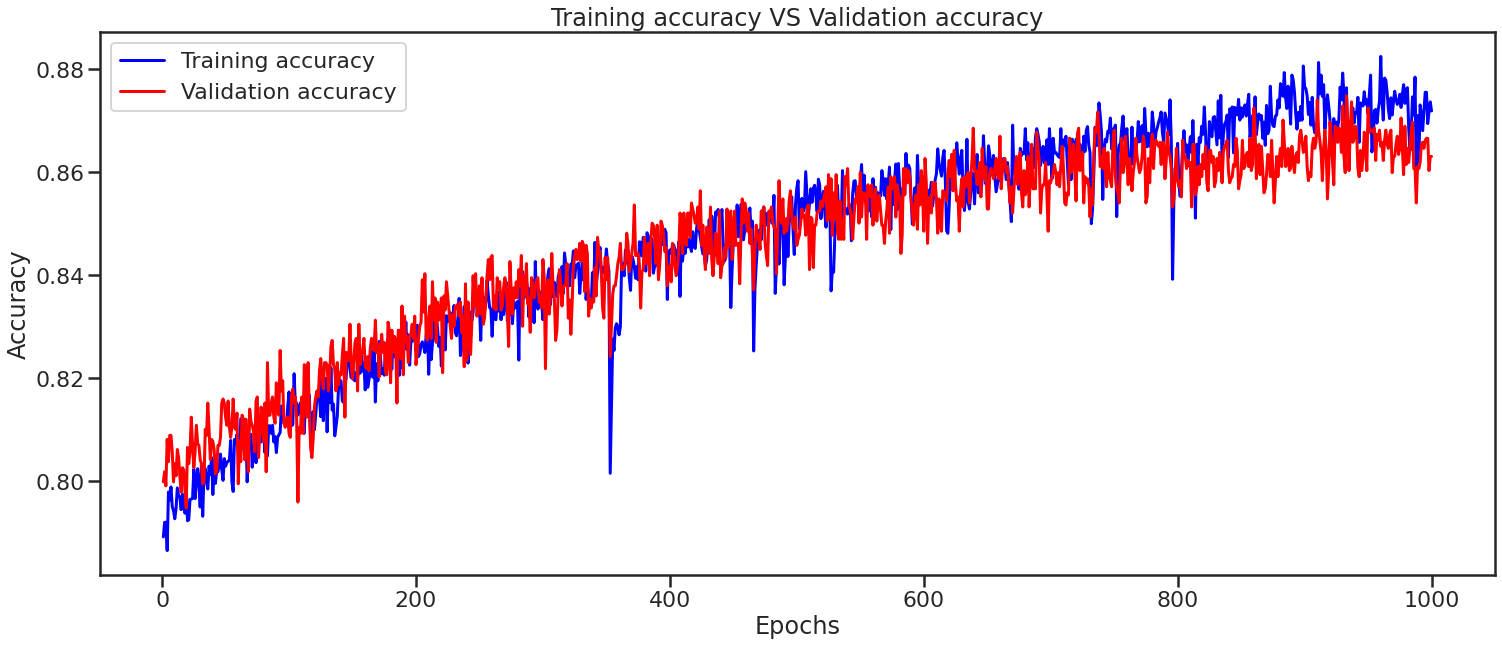

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(range(1,1001),history.history['accuracy'],color="blue", label="Training accuracy", linestyle="-")
plt.plot(range(1,1001),history.history['val_accuracy'],color="red", label="Validation accuracy", linestyle="-")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training accuracy VS Validation accuracy")
plt.legend()
plt.show()

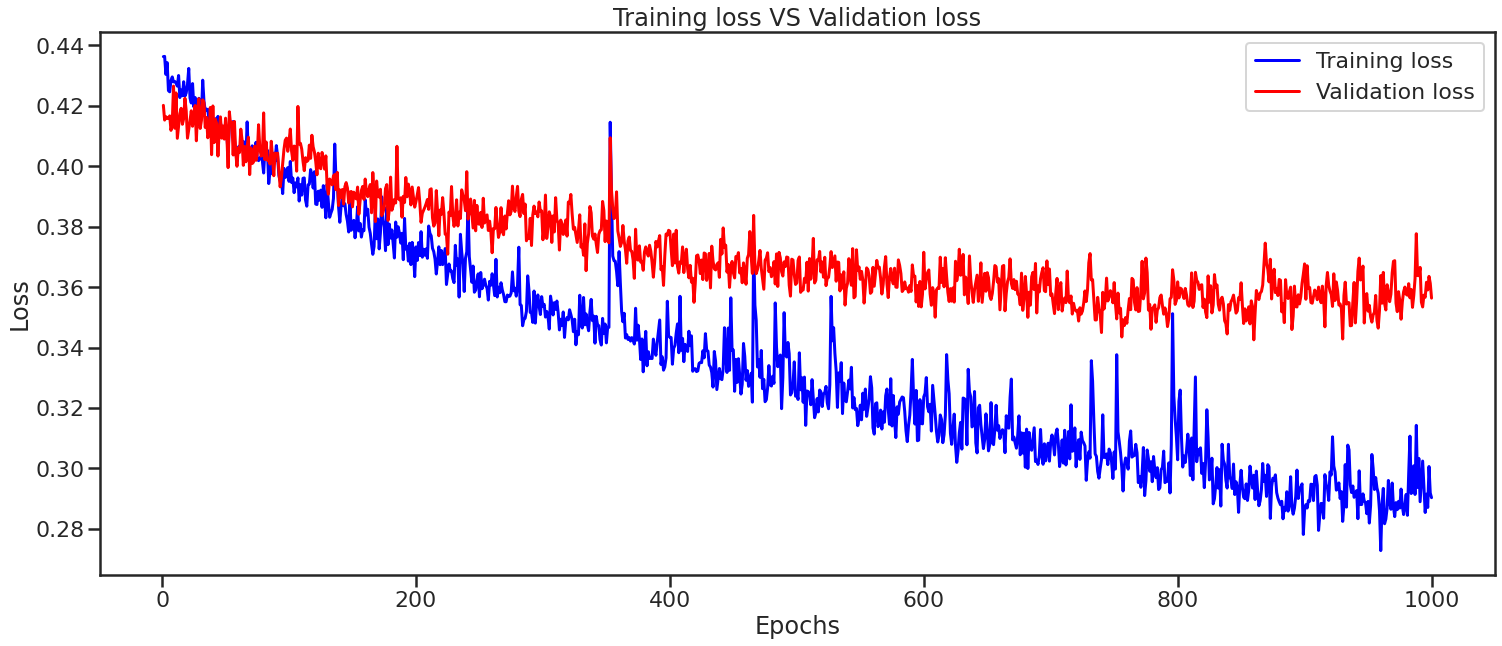

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(range(1,1001),history.history['loss'],color="blue", label="Training loss", linestyle="-")
plt.plot(range(1,1001),history.history['val_loss'],color="red", label="Validation loss", linestyle="-")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Training loss VS Validation loss")
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

100/100 [==============================] - 0s 3ms/step - loss: 0.3785 - accuracy: 0.8515


[0.37847790122032166, 0.8515380024909973]

In [ ]:
y_pred = model.predict_classes(X_test)


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1593
           1       0.81      0.91      0.86      1593

    accuracy                           0.85      3186
   macro avg       0.86      0.85      0.85      3186
weighted avg       0.86      0.85      0.85      3186



In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1261,  332],
       [ 145, 1448]])

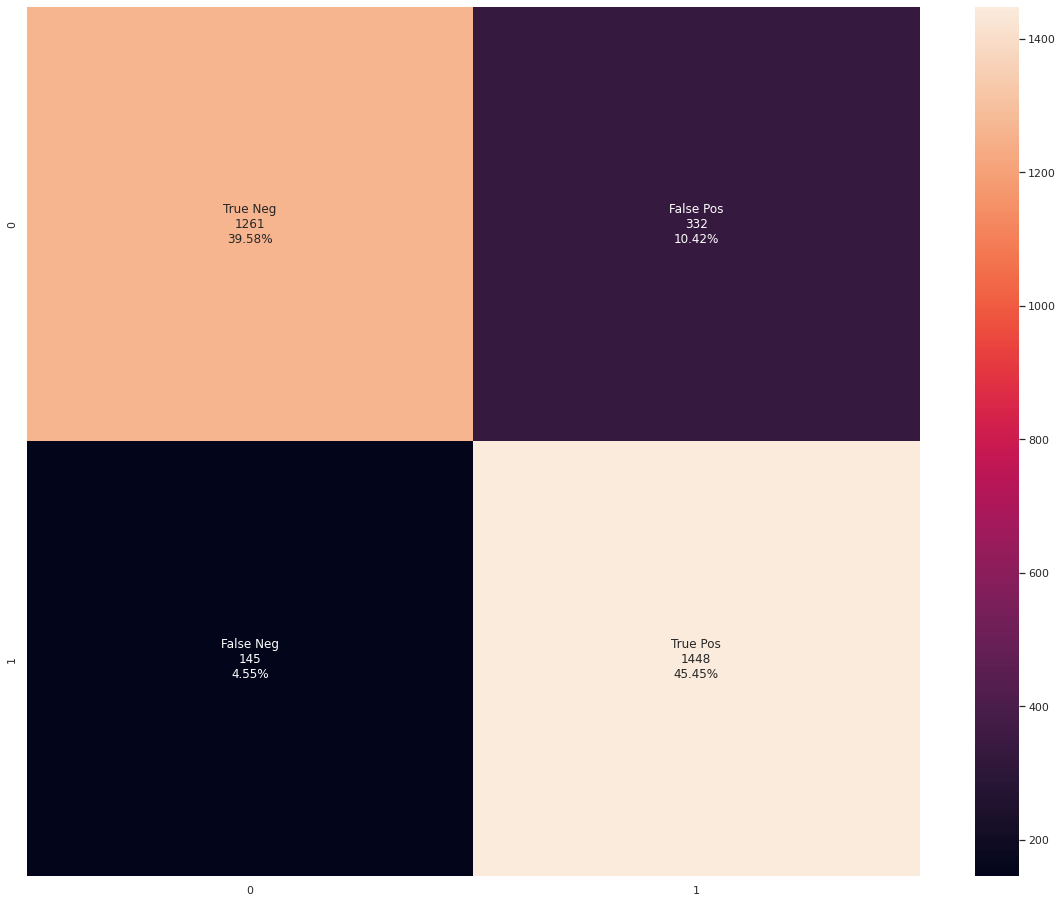

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.subplots(figsize=(20, 16))
sns.heatmap(cm, annot=labels, fmt='')

In [ ]:
model.save("/content/drive/My Drive/ChurnModel/")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/ChurnModel/assets


In [ ]:
model = load_model("/content/drive/My Drive/ChurnModel/")

In [ ]:
model.predict_proba(X_test)

array([[3.3659050e-01],
       [8.5421968e-01],
       [7.7431290e-03],
       ...,
       [6.2666126e-02],
       [4.1755873e-05],
       [9.8494357e-01]], dtype=float32)

In [ ]:
def plot_roc_auc_curve(model,X,y):
  
  y_score = model.predict_proba(X)

  fpr, tpr, thresholds = roc_curve(y, y_score)

  fig = px.area(
      x=fpr, y=tpr,
      title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
      labels=dict(x='False Positive Rate', y='True Positive Rate'),
      width=1400, height=700
  )
  fig.add_shape(
      type='line', line=dict(dash='dash'),
      x0=0, x1=1, y0=0, y1=1
  )

  fig.update_yaxes(scaleanchor="x", scaleratio=1)
  fig.update_xaxes(constrain='domain')
  
  fig.show()


In [ ]:
plot_roc_auc_curve(model,X_test,y_test)